# Programming with time

One topic that we haven't covered yet is how to handle information that has dates. There is a ton of information on the web and in our own research that relies on a point in time to contextualize it. 

One of the first thoughts is that we can write our own code to handle this pretty easily.

That thought is, unfortunately, very wrong. Dates are a lot like the standard measurement system - an unholy mess. Some months have 30 days, others have 31, and February has 28 (except for leap years, then 29). Keeping track of all of this information just to see how much time lapsed is really annoying (and a waste of time to write all the code!).

Fortunately, Python has a library called `datetime` that takes care of most of these problems for us. The only downside is that it's just a little bit confusing!

In [1]:
import datetime

# Datetime is a library but also more.

The `datetime` library has **five** top-level objects within it. 

The first one is called a `date` object and it handles dates. We can get today's date by calling `today()`.

In [2]:
datetime.date.today()

datetime.date(2015, 8, 28)

In [3]:
today = datetime.date.today()
type(today)

datetime.date

The great thing about a datetime object is that we can access the attributes of the date like we would think about.

In [4]:
print('The year is: %d' % today.year)
print('The month is: %d' % today.month)
print('The day is: %d' % today.day)

The year is: 2015
The month is: 8
The day is: 28


But you can tell that there is one part missing, it's the time!

To access time we can't use the `date` class and instead use the `time` class.

In [5]:
datetime.time(20, 30, 50)

datetime.time(20, 30, 50)

In [6]:
time = datetime.time(20, 30, 50)

print('Hours are: %d' % time.hour)
print('Minutes are: %d' % time.minute)
print('Seconds are: %d' % time.second)

Hours are: 20
Minutes are: 30
Seconds are: 50


So we can see that the way we start a time object starts at **hours** (since that is the first type of time we have smaller than a day) and proceeds on there. We can keep adding arguments into the `time()` function all the way to microseconds.

# But a real date has both a date and time!

I admit it, you're right. That's why `datetime` has another object that stores both a date and time.

It's called `datetime()`. 

Yup.

That's right.

The `datetime` package has a `datetime` object.

In [7]:
datetime.datetime.today()

datetime.datetime(2015, 8, 28, 14, 14, 33, 688200)

And all of the same methods apply to get the parts of the date

In [8]:
dt_today = datetime.datetime.today() 

print('The year is: %d' % dt_today.year)
print('The hour is: %d' % dt_today.hour)

The year is: 2015
The hour is: 14


With a `datetime()` object we can also get just a `date()` or `time()` object too.

In [9]:
dt_today.date()

datetime.date(2015, 8, 28)

In [10]:
dt_today.time()

datetime.time(14, 14, 33, 701653)

The fourth object is not another container for raw time (crazy I know!), but it's actually what happens when we subtract two datetime objects - a `timedelta()`. Remember that $\delta$ is the difference in math (thus the 'delta' part attached to the time.

A `timedelta()` object holds the difference between two `datetime` or `date` objects

In [11]:
datetime.datetime.today() - dt_today

datetime.timedelta(0, 0, 36525)

In [12]:
datetime.date.today() - today

datetime.timedelta(0)

Datetime objects also let us easily perform operations to determine order in time.

In [13]:
dt_today < datetime.datetime.today()

True

In [14]:
sorted([dt_today, datetime.datetime.today(), dt_today])

[datetime.datetime(2015, 8, 28, 14, 14, 33, 701653),
 datetime.datetime(2015, 8, 28, 14, 14, 33, 701653),
 datetime.datetime(2015, 8, 28, 14, 14, 33, 771764)]

#Manipulating datetime objects

If you need to manipulate a date, datetime, or time object (like change the day from the 16th to the 1st in order to get a bit more summer) you can use the `replace()` function to change any of the attributes.

In [15]:
dt_today.replace(day = 1)

datetime.datetime(2015, 8, 1, 14, 14, 33, 701653)

In [16]:
today.replace(day = 1)

datetime.date(2015, 8, 1)

In [17]:
time.replace(hour = 10)

datetime.time(10, 30, 50)

However, this isn't always the easiest way to manipulate a datetime object. How do we add a week if the date falls near the end of the month?

We'd have to change both the month and the day, accounting for the length of the month! That's not easy at all. To do that we actually need to use a different library to do that.

In [18]:
from dateutil import relativedelta

dt_today + relativedelta.relativedelta(weeks=1)

datetime.datetime(2015, 9, 4, 14, 14, 33, 701653)

Yes, the relativedelta package follows the same insane naming structure that datetime uses. But it works!

# But that's really only half the battle

Now we've gone over the basics of the package, but that isn't our data! We're going to need to read in data and somehow manipulate it into real datetime objects so that we can work with it.

As an example, let's play stockbrokers and examine the apple stock closing prices since 1980.

In [19]:
#I'm going to read in the Apple stock prices real quick
aapl_stock = [l.strip().split(',') for l in open('../Data/aapl_stock_price.csv')]

#Now let's take a look at what we're dealing with
for line in aapl_stock[:2]:
    print( line )

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close']
['2015-08-24', '94.870003', '103.449997', '92.0', '103.120003', '161454200.0', '103.120003']


But now how are we going to convert this date as a string into a real date?

The `datetime()` object supports a method - called `strptime()` - that allows you to convert a string into a datetime object.

The `strptime()` function takes two arguments, the string that we are trying to convert and a string saying explicitly what the format is. I'll give a quick example first.

In [20]:
datetime.datetime.strptime('2008-12-01', '%Y-%m-%d')

datetime.datetime(2008, 12, 1, 0, 0)

There! We've converted a date that is a string into a datetime object! But what were those weird symbols I gave as the format string? There's actually a large number of them and you just have to match them (and the other punctuation) to your date string.

<img src='../images/strftime_maps.png'></img>

The `strptime()` is a bit hard to remember, but it's easier when you know about it's partner and opposite - `strftime()`.  The `strftime()` function lets you create a **string from time** object. Easier to remember huh ;)

It works very similar, it'll need a datetime object and the format string that we want it to create.

In [21]:
datetime.datetime.strftime(datetime.date.today(), '%Y-%d')

'2015-28'

# Now those are the basics of dates in Python

When dealing with real data, dates are always present. This is how you can handle this information and use it.

So let's go be stockbrokers!

In [22]:
import pandas as pd

df = pd.read_csv('../Data/aapl_stock_price.csv')

df.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close
0,2015-08-24,94.870003,103.449997,92.000000,103.120003,161454200,103.120003
1,2015-08-21,110.430000,111.900002,105.650002,105.760002,126289200,105.760002
2,2015-08-20,114.080002,114.349998,111.629997,112.650002,67765500,112.650002
3,2015-08-19,116.099998,116.519997,114.680000,115.010002,47445700,115.010002
4,2015-08-18,116.430000,117.440002,116.010002,116.500000,34461400,116.500000


In [23]:
df.Date.head()

0    2015-08-24
1    2015-08-21
2    2015-08-20
3    2015-08-19
4    2015-08-18
Name: Date, dtype: object

So now let's change the dates to a datetime variable

In [24]:
df.Date = pd.to_datetime(df.Date)

df.Date.head()

0   2015-08-24
1   2015-08-21
2   2015-08-20
3   2015-08-19
4   2015-08-18
Name: Date, dtype: datetime64[ns]

There! We just converted the `Date` column to datetime. Pandas doesn't use the actual `datetime` package, it uses the Numpy datetime implementation instead but the two are fairly similar

In [25]:
df.Date[0].year

2015

In [26]:
df.Date[0].month

8

In [27]:
df.Date[0].day

24

Now I'm going to do a little bit of housekeeping. We have multiple columns of data, the open price, the high and low of the day, the close price, the volume of stock and it's adjusted closing price. All of those variables are all related to the date, in fact they're not true on any other day!

In a case like this it makes sense make the index of the dataframe the date column. This way whenever we select some columns we know when it occurred.

In [28]:
df.set_index(['Date'], inplace=True)

df.head()

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2015-08-24,94.870003,103.449997,92.000000,103.120003,161454200,103.120003
2015-08-21,110.430000,111.900002,105.650002,105.760002,126289200,105.760002
2015-08-20,114.080002,114.349998,111.629997,112.650002,67765500,112.650002
2015-08-19,116.099998,116.519997,114.680000,115.010002,47445700,115.010002
2015-08-18,116.430000,117.440002,116.010002,116.500000,34461400,116.500000


The great thing is that we can easily get a specific date range now.

In [29]:
df[(df.index > '2013') & (df.index < '2014')].head()

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2013-12-31,554.169960,561.280029,554.000023,561.019997,55771100,77.509204
2013-12-30,557.459969,560.090042,552.320038,554.519981,63407400,76.611177
2013-12-27,563.819954,564.409981,559.500015,560.090042,56471100,77.380723
2013-12-26,568.099998,569.499977,563.379997,563.899956,51002000,77.907092
2013-12-24,569.889999,571.880005,566.029991,567.669975,41888700,78.427949


Super easy! We can just give the date that we are interested in as a string and Pandas will automatically convert it.  This is a lot easier for us than having to make a datetime object first.

If you want to be more specific you just folow the string format of 'YEAR-MONTH-DAY'

In [30]:
df[(df.index > '2013-12-01') & (df.index < '2013-12-31')]

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2013-12-30,557.459969,560.090042,552.320038,554.519981,63407400,76.611177
2013-12-27,563.819954,564.409981,559.500015,560.090042,56471100,77.380723
2013-12-26,568.099998,569.499977,563.379997,563.899956,51002000,77.907092
2013-12-24,569.889999,571.880005,566.029991,567.669975,41888700,78.427949
2013-12-23,568.000023,570.720032,562.760010,570.090004,125326600,78.762294
2013-12-20,545.430000,551.610008,544.820000,549.019989,109103400,75.851311
2013-12-19,549.500000,549.999985,543.729988,544.459991,80077200,75.221312
2013-12-18,549.700005,551.450005,538.799995,550.769989,141465800,76.093087
2013-12-17,555.809998,559.439987,553.380035,554.990005,57475600,76.676114


Now let's just quickly look at the closing price of AAPL stock over time.

In [31]:
%matplotlib inline

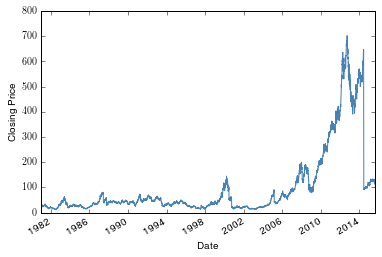

In [32]:
ax = df['Close'].plot(color='steelblue')
ax.set_ylabel('Closing Price')

The great part about having the `Date` as the x-axis is that it is automatically included as the x-axis :)

We could also look at the rolling average too using Pandas to smooth out the data. Using a rolling average with data can be useful when you have a noisy time series.

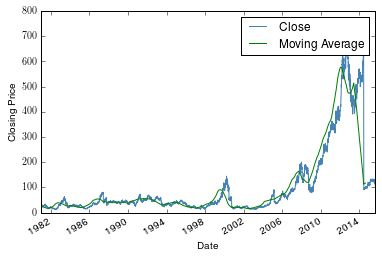

In [33]:
#There are roughly 260 workdays in a year
close_moving_avg = pd.rolling_mean(df.Close, 260)
#Now we just plot it
ax = df.Close.plot(color='steelblue')
close_moving_avg.plot(label='Moving Average', color='green')
ax.set_ylabel('Closing Price')
ax.legend()

# Getting rich quick.

Okay, so I have a great scheme to get rich from trading. Every day I will purchase one share of stock and then sell it the next day. Great idea, right?

We can do this easily by using the `diff()` function. All it does is take the difference between one value and the next (I'll look before 2014 too because of the stock split).

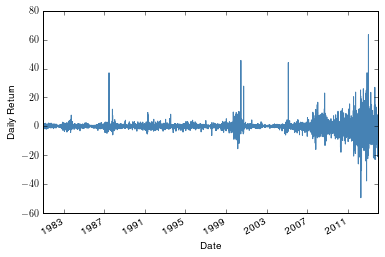

In [34]:
df = df[(df.index < '2014')]
ax = df['Close'].diff().plot(color = 'steelblue')
ax.set_ylabel('Daily Return')

In [35]:
df['Close'].diff().mean()

-0.06385964691061798

Great! So we can see now that there are variations in daily returns that are both positive and negative. On average, if we would have bought a single share of stock every day and sold it the next we would have lost 6 cents (well, excluding our transaction costs which would be approximately $116,704 not adjusted for inflation and assuming that current trading costs were the same as in the past).

That's a great strategy to make money!

# Exercises

If I bought AAPL stock at the opening price on January 3, 1983 and sold it on December 2, 2002, how much money would I have made/lost?

What was the average daily return of AAPL stock in 2013 (Use just the close price)?

Convert the string date to a datetime object. Note that I have used the letter `a` to separate year, month, and day

In [36]:
stringdate = '2013a3a17'


Convert the previous datetime object to a string that reads `Mar. 17, 2013`

That's it! You're a date master now!

In [37]:
from IPython.core.display import HTML
from IPython.lib.display import YouTubeVideo


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()